In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backport

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2023-05-28 23:14:46.407532: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-28 23:14:46.458295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 23:14:47.049195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.path.join('data', 'happy')

'data/happy'

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

2023-05-28 23:14:51.100254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 23:14:51.117609: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
len(gpus)

1

In [5]:
#Avoid OOM errors by setting GPU Memory Consumrtion Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

## 1.2 Remove dodgy images

In [7]:
# Import required libraries
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
# Define the path to the data directory
data_dir = '/home/mitraa/Jupyter Notebook/Emotion Detection CNN/datas'

In [9]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training')

val_datagen = ImageDataGenerator()

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation')

Found 104 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [10]:
# Print the list of files in the 'happy' subdirectory of the data directory
os.listdir(os.path.join(data_dir, 'happy'))

['jumping-and-dancing-happy-people-positive-emotions-set-illustration-free-vector.jpg',
 'smile.woman_.jpg',
 'AOLn63FpC7c2362vQI93kpEjbgobDYcM8VzaVLuBKTEWs64-c-mo.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'png-transparent-graphy-happy-people-love-child-photography-thumbnail.png',
 'happyball-3.jpg',
 'e60b714c-07cf-417a-912f-5758293ce23b_1140x641.jpg',
 'happypeople-1024x679.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'file-20230208-27-3jttof.jpg',
 'happy-person.jpeg',
 'image29.jpeg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'image22.jpeg',
 'friends-happy-190821.jpg',
 'images2.jpg',
 'GettyImages-454356720.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'what-makes-people-happy1.jpg',
 'image21.jpeg',
 '05-12-21-happy-people.jpg',
 'compassion-900x387.jpg',
 'happy-people-

In [11]:
# Define a list of valid image file extensions
image_exts = ['jpeg','jpg','bmp','png']

In [12]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

jumping-and-dancing-happy-people-positive-emotions-set-illustration-free-vector.jpg
smile.woman_.jpg
AOLn63FpC7c2362vQI93kpEjbgobDYcM8VzaVLuBKTEWs64-c-mo.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
png-transparent-graphy-happy-people-love-child-photography-thumbnail.png
happyball-3.jpg
e60b714c-07cf-417a-912f-5758293ce23b_1140x641.jpg
happypeople-1024x679.jpg
GettyImages-871518740-1024x707.jpg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
file-20230208-27-3jttof.jpg
happy-person.jpeg
image29.jpeg
gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg
ipsos-global-advisor-happiness-2022-opti.jpg
_happy_jumping_on_beach-40815.jpg
image22.jpeg
friends-happy-190821.jpg
images2.jpg
GettyImages-454356720.jpg
Dollarphotoclub_76084977-1.jpg
what-makes-people-happy1.jpg
image21.jpeg
05-12-21-happy-people.jpg
compassion-900x387.jpg
happy-people-using-mobile-smart-phone-men-women-94083621.jpg
image17.jpeg
friends_190412.jpg
happy-people-habits.jp

In [13]:
# Load an example image and display its shape and content
img = cv2.imread(os.path.join('datas','happy','05-12-21-happy-people.jpg'))
img.shape

(880, 1400, 3)

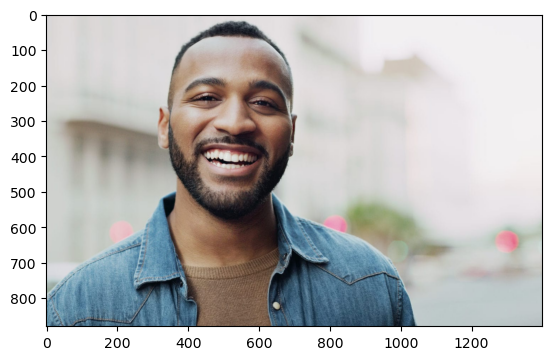

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full path to the current image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Read the image data and determine its file type using the imghdr module
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # If the file type is not one of the valid image extensions, delete the file
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            # If an error occurs while processing the image, delete the file
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

## 1.3 Load Data

In [15]:
tf.data.Dataset??

In [16]:
# Import required libraries
import numpy as np

In [24]:
tf.keras.utils.image_dataset_from_directory??

In [17]:
# Load the image data into a TensorFlow dataset object
data = tf.keras.utils.image_dataset_from_directory('datas')

Found 104 files belonging to 2 classes.


In [18]:
# Get an iterator over the dataset
data_iterator = data.as_numpy_iterator()
data_iterator

2023-05-28 23:15:31.164781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-28 23:15:31.164984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [104]
	 [[{{node Placeholder/_0}}]]


In [19]:
# Get another batch from the itterator
# Get the first batch of images and their corresponding labels
batch = data_iterator.next()
batch

(array([[[[2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          [2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          [2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          ...,
          [2.39000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.39000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.39000000e+02, 2.39000000e+02, 2.39000000e+02]],
 
         [[2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          [2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          [2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          ...,
          [2.39000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.39000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.39000000e+02, 2.39000000e+02, 2.39000000e+02]],
 
         [[2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          [2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          [2.15000000e+02, 2.15000000e+02, 2.15000000e+02],
          ...,
          [2.39000000e+02, 2.39000000e+02, 2.3900

In [20]:
# Images represented as numpy arrays:
# Print the shape of the images in the batch
batch[0].shape

(32, 256, 256, 3)

In [21]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
# Print the labels of the images in the batch
batch[1]

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

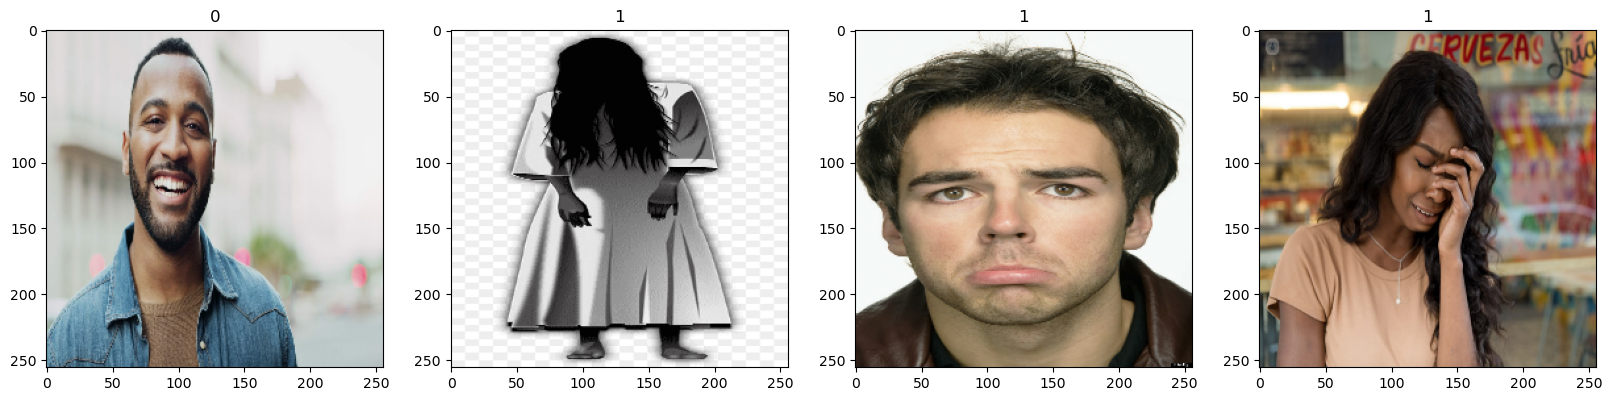

In [22]:
# Display the first four images in the batch along with their labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
# Scale the pixel values of the images to be between 0 and 1
scaled = batch[0] / 255
scaled.min()

0.0

In [24]:
# Print the minimum and maximum pixel values of the scaled images
scaled.max()

1.0

# 2. Preprocess Data


## 2.1 Scale Data

In [25]:
# Apply the scaling function to the entire dataset using the map() method
data = data.map(lambda x,y: (x/255,y))

In [26]:
# Get an iterator over the scaled dataset
scaled_iterator = data.as_numpy_iterator()

2023-05-28 23:15:47.551239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-28 23:15:47.551486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


In [27]:
# Get the first batch of images and their corresponding labels from the scaled dataset
batch = scaled_iterator.next()

In [28]:
# Print the maximum pixel value of the images in the batch
batch[0].max()

1.0

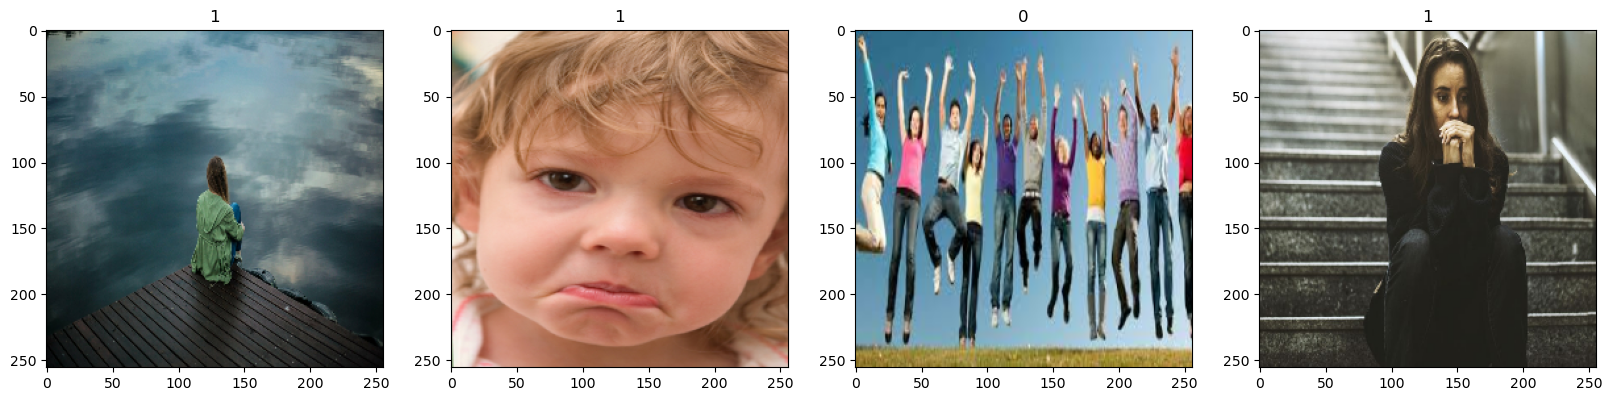

In [29]:
# Display the first four images in the batch from the scaled dataset
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [30]:
len(data)

4

In [31]:
# Calculate the sizes of the training, validation, and testing sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [32]:
train_size + test_size + val_size

4

In [33]:
# Split the dataset into training, validation, and testing sets using the take() and skip() methods
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(train)

2

# 3 Deep Model

## 3.1 Build Deep Learning Model

In [35]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [40]:
logdir = 'logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-05-28 23:16:18.005248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-28 23:16:18.005526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


2/2 [==============================] - ETA: 0s - loss: 1.0389 - accuracy: 0.4531

2023-05-28 23:16:19.418486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-28 23:16:19.418774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


2/2 [==============================] - 2s 824ms/step - loss: 1.0389 - accuracy: 0.4531 - val_loss: 1.8059 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 1s 702ms/step - loss: 1.3020 - accuracy: 0.5625 - val_loss: 0.5515 - val_accuracy: 0.6875
Epoch 3/20
2/2 [==============================] - 1s 693ms/step - loss: 0.6626 - accuracy: 0.5469 - val_loss: 0.6671 - val_accuracy: 0.6562
Epoch 4/20
2/2 [==============================] - 1s 692ms/step - loss: 0.6691 - accuracy: 0.6875 - val_loss: 0.6408 - val_accuracy: 0.8125
Epoch 5/20
2/2 [==============================] - 1s 695ms/step - loss: 0.6432 - accuracy: 0.6562 - val_loss: 0.5369 - val_accuracy: 0.6562
Epoch 6/20
2/2 [==============================] - 1s 701ms/step - loss: 0.6474 - accuracy: 0.5625 - val_loss: 0.5924 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 1s 712ms/step - loss: 0.5902 - accuracy: 0.6719 - val_loss: 0.6568 - val_accuracy: 0.6562
Epoch 8/20
2/2 [===============

In [43]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=50,
                    verbose=1)

Epoch 1/50


2023-05-28 23:16:50.133764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 3s 691ms/step - loss: 93.5282 - accuracy: 0.6635
Epoch 2/50
4/4 [==============================] - 3s 732ms/step - loss: 39.1872 - accuracy: 0.6346
Epoch 3/50
4/4 [==============================] - 3s 619ms/step - loss: 14.0412 - accuracy: 0.6923
Epoch 4/50
4/4 [==============================] - 3s 632ms/step - loss: 12.1108 - accuracy: 0.6538
Epoch 5/50
4/4 [==============================] - 3s 550ms/step - loss: 7.4379 - accuracy: 0.7596
Epoch 6/50
4/4 [==============================] - 3s 877ms/step - loss: 3.0228 - accuracy: 0.7308
Epoch 7/50
4/4 [==============================] - 3s 614ms/step - loss: 3.0700 - accuracy: 0.7212
Epoch 8/50
4/4 [==============================] - 3s 645ms/step - loss: 1.6579 - accuracy: 0.8077
Epoch 9/50
4/4 [==============================] - 3s 857ms/step - loss: 2.3209 - accuracy: 0.6635
Epoch 10/50
4/4 [==============================] - 3s 886ms/step - loss: 2.3828 - accuracy: 0.7115
Epoch 11/50
4/4 [=========

In [44]:
hist.history

{'loss': [1.0388970375061035,
  1.302046298980713,
  0.6625906825065613,
  0.6690613031387329,
  0.6431758403778076,
  0.6474189162254333,
  0.59022057056427,
  0.6160796880722046,
  0.4792732000350952,
  0.5567730665206909,
  0.4658318758010864,
  0.4053061008453369,
  0.36180996894836426,
  0.3623479902744293,
  0.27804505825042725,
  0.27274665236473083,
  0.2203192412853241,
  0.1876041293144226,
  0.11766768246889114,
  0.09607485681772232],
 'accuracy': [0.453125,
  0.5625,
  0.546875,
  0.6875,
  0.65625,
  0.5625,
  0.671875,
  0.6875,
  0.859375,
  0.625,
  0.734375,
  0.90625,
  0.921875,
  0.859375,
  0.90625,
  0.890625,
  0.9375,
  0.90625,
  0.984375,
  0.984375],
 'val_loss': [1.805878758430481,
  0.5514988899230957,
  0.6670997142791748,
  0.6407556533813477,
  0.5368762612342834,
  0.5924036502838135,
  0.6568318605422974,
  0.5164766311645508,
  0.5066792964935303,
  0.45049357414245605,
  0.459951251745224,
  0.3974912166595459,
  0.3451573848724365,
  0.304038941860

## 3.3 Plot Performance

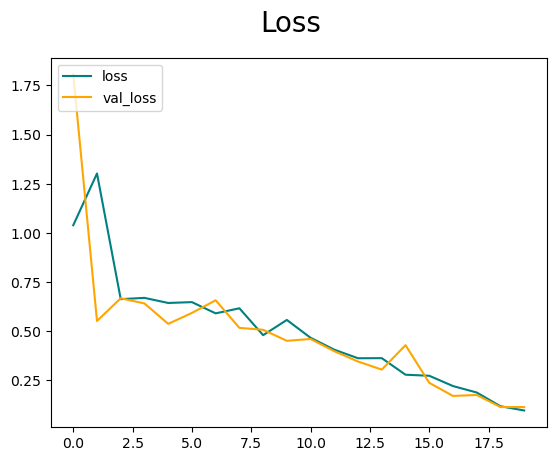

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

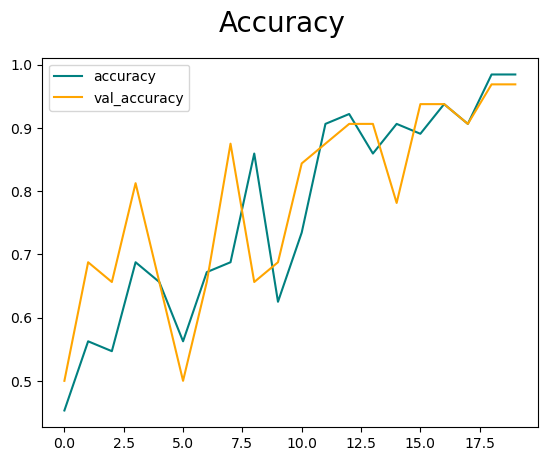

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

## 4.1 Evaluate 

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
len(test)

1

In [50]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-28 23:20:16.365760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-28 23:20:16.366025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 69ms/step


In [51]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.375, Recall:1.0, Accuracy:0.375


## 4.2 Test

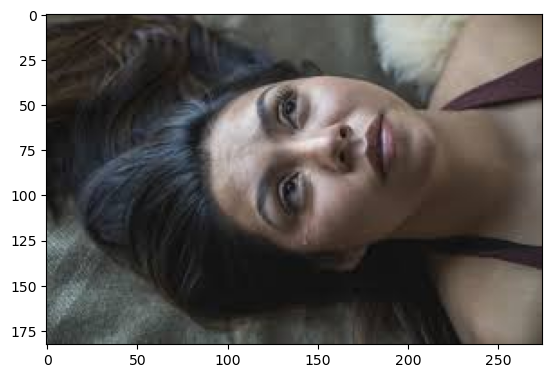

In [52]:
img = cv2.imread('sad test.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

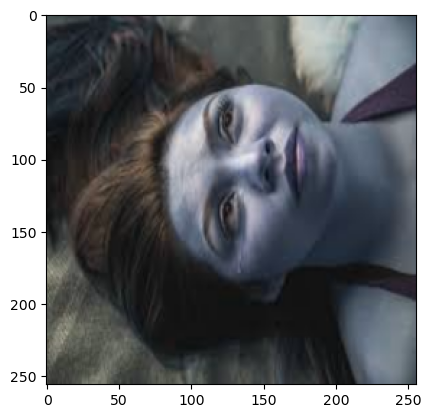

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 15ms/step


In [55]:
yhat

array([[0.63743025]], dtype=float32)

In [56]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 5. Save the Model

## 5.1 Save the Model